# Econet Customer Service Sentiment Analysis

This is a continuation from the previous notebook. The previous notebook was about cleaning the data. This one is about analysis. Let's list our objectives again to keep within our scope of the project.

## Primary Objective:
 - A time series analysis of how the frequency of complaints on service has changed over the last 9 years.

## Other Objectives:
 - Which month does Econet experience the most complaints?
 - Which type of complaint is most prevalent? How do these complaint categories change over time?
 - How often do customers complain that their enquiries are being ignored?
 - Which Econet SBU experiences the most customer complaints?
 - Is there a certain cluster/segment of Econet's customers that experience poor service the most?
 - Has there been a change in the percentage of complaints that Econet gets as its market share has changed over the years?
 - How does Econet's customer service compare to it's competitors?

Let's import relevant packages.

In [96]:
import pandas as pd
import numpy as np
import re
import nltk
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns

%matplotlib inline

from wordcloud import WordCloud
from datetime import datetime

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
data = pd.read_csv('/home/simbarashe/Desktop/EconetSentimentAnalysis/data_clean_main.csv', index_col=0)

In [20]:
data.tail()

,likes,replies,retweets,text,user_screen_name,tidy_tweet,tokenized_tweet,MNO_label,lang,sentiment
created_at,,,,,,,,,,
2014-11-25 12:36:02,2,1,1,@stewardbank if only all customer care agents ...,ralphtaa,steward if only all customer care agents woul...,"['stewardbank', 'if', 'only', 'all', 'customer...",e,True,pos
2014-11-15 05:29:55,2,0,1,@moyo_buhle @econet_support Worry not buddie @...,mykdoma,moyo buhle econet support worry not buddie ...,"['moyo', 'buhle', 'econet', 'support', 'worry'...",e,True,pos
2014-10-17 12:36:13,3,1,2,@econet_support @econetzimbabwe since you inco...,dexterbaysiq,econet support econet since you inconvenienc...,"['econet', 'support', 'econetzimbabwe', 'since...",e,True,pos
2014-10-09 06:15:07,2,1,2,@econet_support cab you explain that to me? An...,costadisa,econet support cab you explain that to me an...,"['econet', 'support', 'cab', 'you', 'explain',...",e,True,pos
2013-12-10 13:17:26,0,0,2,"""@econet_support: What about #Twitter bundles?...",Itskarizma,econet support what about # s if you want...,"['econet', 'support', 'what', 'about', '#', 'b...",e,True,pos


In [16]:
dat_drop = data[data['user_screen_name'].str.contains('jacksonmadzimba|MuzindaHub|HigherLifeFDN|neildrewitt', regex=True)]

In [17]:
data.drop(dat_drop.index, inplace=True)

In [5]:
data.index = pd.to_datetime(data.index)

### Customer complaints/enquiries by MNO

Let's begin by categorizing our data into respective MNOs.

In [21]:
data_econet = data[(data['MNO_label']=='e') | (data['MNO_label']=='ec')]

In [23]:
print('Econet has {} enquiries/complaints betweend Dec 2013 and March 2019'.format(data_econet.shape[0]))

Econet has 2133 enquiries/complaints betweend Dec 2013 and March 2019


In [13]:
data_comp = data[data['MNO_label']=='c']

In [24]:
print("Econet's competitors have a combined {} complaints/enquiries within the same period".format(data_comp.shape[0]))

Econet's competitors have a combined 477 complaints/enquiries within the same period


### Visualizing the data

Let's plot a daily time series of the customer enquiries over the years for Econet and its competitors.

First, we need to add an 'enquiry_count' column to our data which we can aggregate over.

In [26]:
data.shape[0]

2610

In [27]:
count_array = np.full(2610, 1)

In [28]:
data['enquiry_count'] = count_array

Let's update our MNO dataframes.

In [29]:
data_econet = data[(data['MNO_label']=='e') | (data['MNO_label']=='ec')]
data_comp = data[data['MNO_label']=='c']

In [84]:
sns.set(rc={'figure.figsize':(12, 5)})

In [64]:
warnings.filterwarnings("ignore", category=pd.core.common.SettingWithCopyWarning)

In [65]:
data_econet.sort_index(inplace=True)
data_comp.sort_index(inplace=True)

In [67]:
data_econet.tail(1)

,likes,replies,retweets,text,user_screen_name,tidy_tweet,tokenized_tweet,MNO_label,lang,sentiment,enquiry_count
created_at,,,,,,,,,,,
2019-03-26 17:02:22,1,1,1,was using econet twtter..ndaa paden manje n th...,Luke_Snow69,was using econet twtter ndaa paden manje n th...,"['was', 'using', 'econet', 'twtter', 'ndaa', '...",e,True,neutral,1


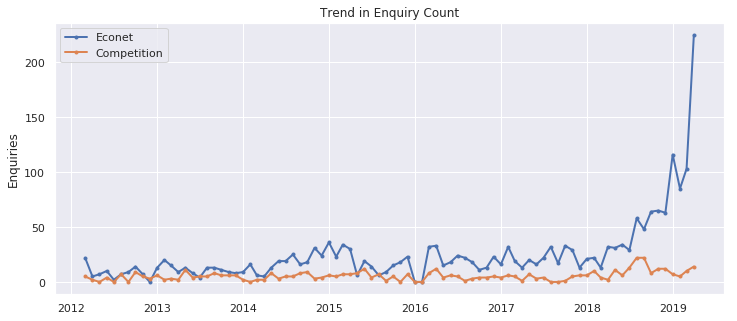

In [85]:
fig, ax = plt.subplots()
ax.plot(data_econet['enquiry_count'].resample("M", convention='end').sum(), marker='.', linewidth=2, label="Econet")
ax.set_ylabel("Enquiries")
ax.set_title("Trend in Enquiry Count")
ax.plot(data_comp['enquiry_count'].resample("M", convention='end').sum(), marker='.', linewidth=2, label="Competition")
ax.legend()
plt.grid(which='minor', axis='both')

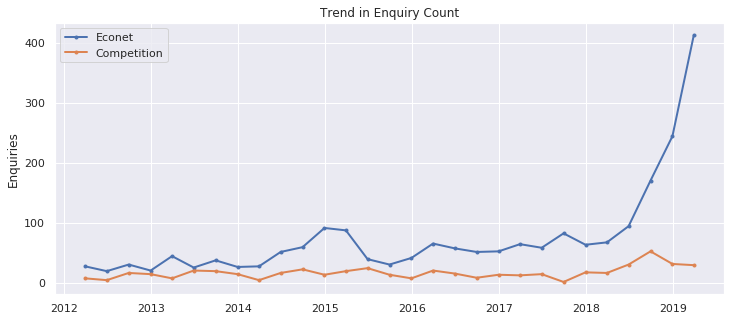

In [86]:
fig, ax = plt.subplots()
ax.plot(data_econet['enquiry_count'].resample("Q", convention='end').sum(), marker='.', linewidth=2, label="Econet")
ax.set_ylabel("Enquiries")
ax.set_title("Trend in Enquiry Count")
ax.plot(data_comp['enquiry_count'].resample("Q", convention='end').sum(), marker='.', linewidth=2, label="Competition")
ax.legend()
plt.grid(which='minor', axis='both')

 - The trend in both aggregations of by month and by quarter show that the enquiries are mostly average from 2012 to the first quarter of 2014.
 - From then on, there's a steady rise to 2015. The numbers take a sharp dip after the first quarter of 2015 then stabilize until the second quarter of 2018.
 - From here, the numbers rise sharply, very suddenly through to 2019.

Let's investigate Why there are so much complaints from June 2018 onwards.

In [90]:
print(data_econet.loc['2018-06':].shape[0])
data_econet.loc['2018-06':].head()

856


,likes,replies,retweets,text,user_screen_name,tidy_tweet,tokenized_tweet,MNO_label,lang,sentiment,enquiry_count
created_at,,,,,,,,,,,
2018-06-01 17:05:07,29,12,11,ECONET Wireless Zimbabwe Limited (EWZL) has re...,NewsDayZimbabwe,econet limited ewzl has registered a near ...,"['econet', 'wireless', 'zimbabwe', 'limited', ...",e,True,neutral,1
2018-06-02 22:50:20,20,5,9,"Kwese TV, a unit of Econet Media, has created ...",bustoptv,kwese tv a unit of econet has created ...,"['kwese', 'tv', 'a', 'unit', 'of', 'econet', '...",e,True,neutral,1
2018-06-03 17:08:16,16,2,11,Barclays Bank profits - 83%; Old Mutual 139%; ...,GwisaiMunya,barclays profits old mutual econ...,"['barclays', 'bank', 'profits', 'old', 'mutual...",e,True,neutral,1
2018-06-05 16:10:15,97,23,17,I was just talking to a 22 year old who didn’t...,T1mbles,i was just talking to a year old who didn t...,"['i', 'was', 'just', 'talking', 'to', 'a', 'ye...",e,True,neg,1
2018-06-06 12:17:42,21,2,18,"View your Call Records, monitor your Data Usag...",buzy263,view your call records monitor your data usag...,"['view', 'your', 'call', 'records', 'monitor',...",e,True,pos,1


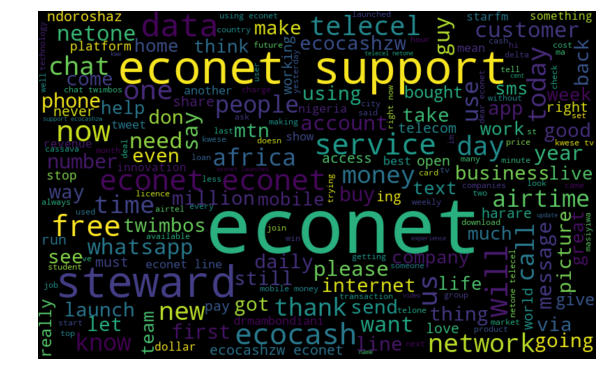

In [91]:
all_words = ' '.join([text for text in data_econet['tidy_tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

The word cloud above has a lot of words in it. Let's list the ones that are most likely to be considered enquiries.
 - threats to switch to a competitor (telecel or netone)
 - steward bank
 - whatsapp
 - data
 - ecocash
 - service
 - kwese
 - network

Let's see how frequently these words occur.

In [92]:
def word_extract(x):
    words = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"steward|whatsapp|data|ecocash|data|service|service|kwese|network", i)
        words.append(ht)

    return words

In [93]:
words = word_extract(data_econet['tidy_tweet'])

# unnesting list
words = sum(words,[])

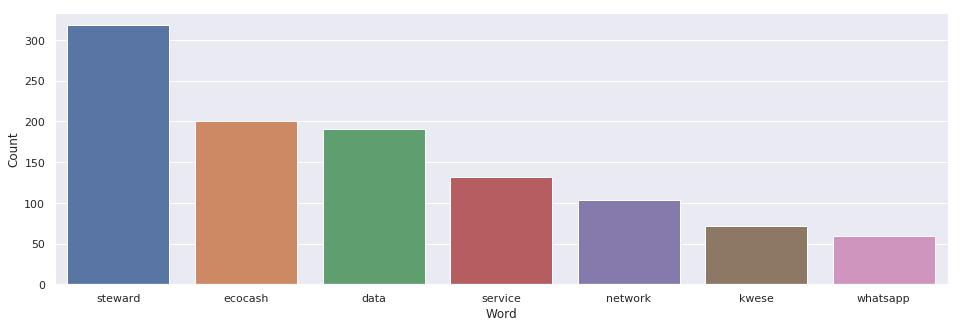

In [97]:
a = nltk.FreqDist(words)
d = pd.DataFrame({'Word': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Word", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

Let's clean our data of rows that contain the term steward.

In [102]:
dat_steward = data_econet[data_econet['tidy_tweet'].str.contains('steward', regex=True)]

In [104]:
dat_steward = dat_steward[dat_steward['sentiment']=='pos']

In [105]:
data_econet.drop(dat_steward.index, inplace=True)

In [108]:
dat_steward = data_econet[data_econet['tidy_tweet'].str.contains('steward', regex=True)]

In [109]:
dat_steward = dat_steward[dat_steward['sentiment']=='neutral']

In [110]:
data_econet.drop(dat_steward.index, inplace=True)

In [112]:
data_econet[data_econet['tidy_tweet'].str.contains('steward', regex=True)].shape[0]

40

In [113]:
words = word_extract(data_econet['tidy_tweet'])

# unnesting list
words = sum(words,[])

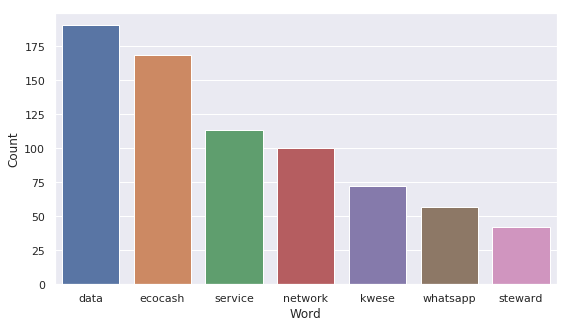

In [116]:
a = nltk.FreqDist(words)
d = pd.DataFrame({'Word': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(9,5))
ax = sns.barplot(data=d, x= "Word", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [120]:
data_econet[data_econet['tidy_tweet'].str.contains('ecocash', regex=True)].head()

,likes,replies,retweets,text,user_screen_name,tidy_tweet,tokenized_tweet,MNO_label,lang,sentiment,enquiry_count
created_at,,,,,,,,,,,
2012-02-15 13:43:00,1,0,0,"A case study for EcoCash, Net*One and Telecel ...",nqabamatshazi,a case study for ecocash net one and telecel,"['a', 'case', 'study', 'for', 'ecocash', 'net'...",e,True,neutral,1
2012-03-12 11:26:23,0,2,2,#Zimbabwe: #Econet has signed up 1m users to i...,BalancingActAfr,# #econet has signed up m users to its m mon...,"['#zimbabwe', '#econet', 'has', 'signed', 'up'...",e,True,neg,1
2012-10-26 09:30:47,0,0,1,Econet interim results: US $78 million in afte...,Techzim,econet interim results us million in afte...,"['econet', 'interim', 'results', 'us', 'millio...",e,True,neutral,1
2012-12-17 14:28:16,0,1,7,So #Ecocash is making waves. When will Telecel...,SimbaMhuriro,so #ecocash is making waves when will telecel...,"['so', '#ecocash', 'is', 'making', 'waves', 'w...",e,True,neutral,1
2013-01-14 23:09:44,2,0,4,ECOCASH CREATES 5 000 NEW JOBS IN ZIMBABWE: E...,Newsdzezimbabwe,ecocash creates new jobs in econet ...,"['ecocash', 'creates', 'new', 'jobs', 'in', 'z...",e,True,neutral,1


Ecocash was introduced in 2012. It stands to reason that in the beginning, there were not much complaints. Let's remove all ecocash related tweets from 2012 to 2014.

In [121]:
dat_ecocash = data_econet[data_econet['tidy_tweet'].str.contains('ecocash', regex=True)]

In [122]:
dat_ecocash = dat_ecocash[dat_ecocash['sentiment']=='neutral']

In [123]:
dat_ecocash = dat_ecocash.loc['2012':'2014']

In [124]:
data_econet.drop(dat_ecocash.index, inplace=True)

In [125]:
words = word_extract(data_econet['tidy_tweet'])

# unnesting list
words = sum(words,[])

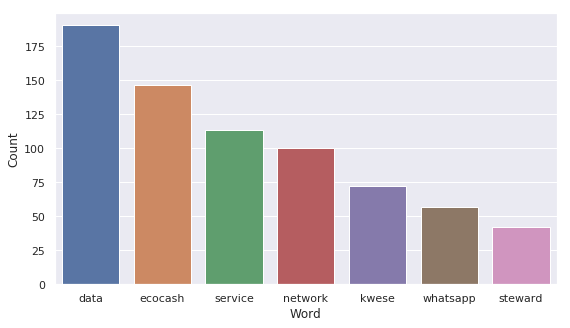

In [126]:
a = nltk.FreqDist(words)
d = pd.DataFrame({'Word': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(9,5))
ax = sns.barplot(data=d, x= "Word", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [131]:
data_econet[data_econet['tidy_tweet'].str.contains('service', regex=True)].head()

,likes,replies,retweets,text,user_screen_name,tidy_tweet,tokenized_tweet,MNO_label,lang,sentiment,enquiry_count
created_at,,,,,,,,,,,
2012-03-12 11:26:23,0,2,2,#Zimbabwe: #Econet has signed up 1m users to i...,BalancingActAfr,# #econet has signed up m users to its m mon...,"['#zimbabwe', '#econet', 'has', 'signed', 'up'...",e,True,neg,1
2012-04-22 17:03:06,0,0,4,#RememberWhen MTN &Econet were the only servic...,piktcha_purfekt,#rememberwhen mtn econet were the only servic...,"['#rememberwhen', 'mtn', 'econet', 'were', 'th...",e,True,neg,1
2012-07-13 07:49:37,0,0,2,Zimbabwe's Econet Wireless could become the co...,Ejiro_,s econet could become the country s largest ...,"['zimbabwe', 's', 'econet', 'wireless', 'could...",e,True,neutral,1
2012-08-05 19:21:01,13,1,134,This Day in History: 2001 - GSM service came i...,AscologyNews,this day in history gsm service came i...,"['this', 'day', 'in', 'history', 'gsm', 'servi...",e,True,neutral,1
2013-02-16 19:26:41,0,1,4,"Mtn in unical is also thrash""@gbagaunfreak: Ec...",princevigho,mtn in unical is also thrash gbagaunfreak ec...,"['mtn', 'in', 'unical', 'is', 'also', 'thrash'...",e,True,neg,1


In [132]:
dat_ser = data_econet[data_econet['tidy_tweet'].str.contains('service', regex=True)]

In [134]:
dat_ser = dat_ser[dat_ser['sentiment']=='neutral']

In [135]:
dat_ser = dat_ser.loc['2012':'2014']

In [136]:
data_econet.drop(dat_ser.index, inplace=True)

In [137]:
words = word_extract(data_econet['tidy_tweet'])

# unnesting list
words = sum(words,[])

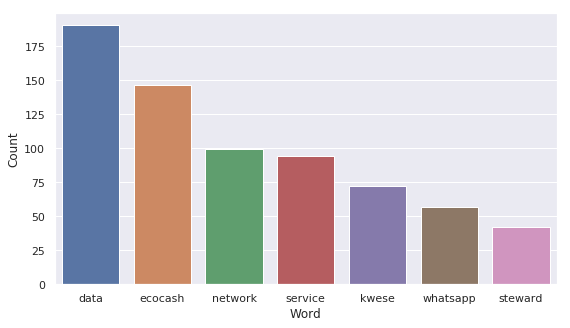

In [138]:
a = nltk.FreqDist(words)
d = pd.DataFrame({'Word': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(9,5))
ax = sns.barplot(data=d, x= "Word", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [139]:
dat_net = data_econet[data_econet['tidy_tweet'].str.contains('network', regex=True)]

In [141]:
dat_net = dat_net[dat_net['sentiment']=='neutral']

In [142]:
dat_net = dat_net.loc['2012':'2014-11']

In [143]:
data_econet.drop(dat_net.index, inplace=True)

In [144]:
words = word_extract(data_econet['tidy_tweet'])

# unnesting list
words = sum(words,[])

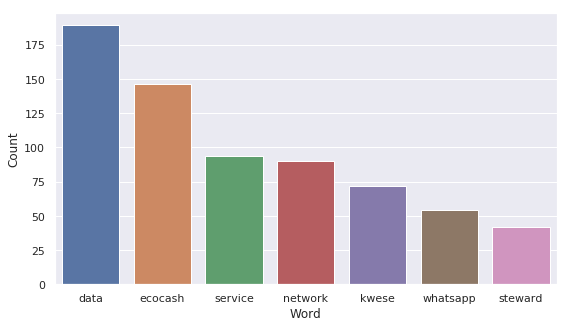

In [145]:
a = nltk.FreqDist(words)
d = pd.DataFrame({'Word': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(9,5))
ax = sns.barplot(data=d, x= "Word", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [147]:
data_econet[data_econet['tidy_tweet'].str.contains('kwese', regex=True)].head()

,likes,replies,retweets,text,user_screen_name,tidy_tweet,tokenized_tweet,MNO_label,lang,sentiment,enquiry_count
created_at,,,,,,,,,,,
2016-03-17 11:32:20,4,0,2,Econet Acquires Premier League Rights Deal htt...,TCwamambo,econet acquires premier league rights deal v...,"['econet', 'acquires', 'premier', 'league', 'r...",e,True,neutral,1
2016-03-24 14:18:32,11,1,12,#Twimbos @Econet hired this former @MultiChoic...,Techzim,#twimbos econet hired this former multichoic...,"['#twimbos', 'econet', 'hired', 'this', 'forme...",e,True,neutral,1
2016-08-11 14:08:34,7,0,8,#KweseFreeSports Econet Media team having a li...,xtremeafrica,#kwesefreesports econet team having a light m...,"['#kwesefreesports', 'econet', 'media', 'team'...",e,True,neutral,1
2016-09-01 07:11:47,12,16,41,Charamba orders ZBC to cancel deal with Econet...,ZimMediaReview,charamba orders zbc to cancel deal with econet...,"['charamba', 'orders', 'zbc', 'to', 'cancel', ...",e,True,neutral,1
2016-09-26 08:42:29,4,0,3,[ADVERTISEMENT]: Econet Media ventures into #R...,NewTimesRwanda,advertisement econet ventures into #rwanda...,"['advertisement', 'econet', 'media', 'ventures...",e,True,neutral,1


A big majority of the kwese tweets do not seem to be related to enquiries or complaints at all. Let's delete them.

In [148]:
dat_kwese = data_econet[data_econet['tidy_tweet'].str.contains('kwese', regex=True)]

In [149]:
data_econet.drop(dat_kwese.index, inplace=True)

In [150]:
words = word_extract(data_econet['tidy_tweet'])

# unnesting list
words = sum(words,[])

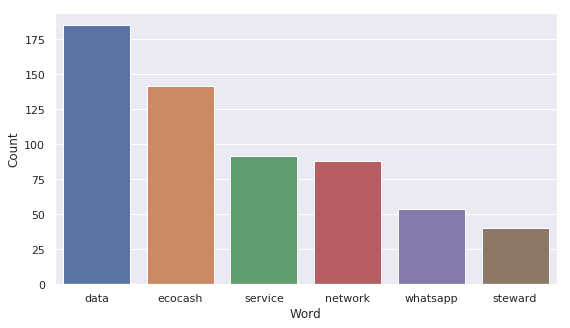

In [151]:
a = nltk.FreqDist(words)
d = pd.DataFrame({'Word': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(9,5))
ax = sns.barplot(data=d, x= "Word", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [155]:
data_econet[data_econet['tidy_tweet'].str.contains('whatsapp', regex=True)].head()

,likes,replies,retweets,text,user_screen_name,tidy_tweet,tokenized_tweet,MNO_label,lang,sentiment,enquiry_count
created_at,,,,,,,,,,,
2013-09-30 08:32:01,0,9,3,Today we need to get a dedicated line for #263...,263Chat,today we need to get a dedicated line for # ...,"['today', 'we', 'need', 'to', 'get', 'a', 'ded...",ec,True,neutral,1
2014-07-07 14:12:55,1,0,3,WhatsAppening in Zimbabwe? One operator is lea...,Sandvine,whatsappening in one operator is learning ho...,"['whatsappening', 'in', 'zimbabwe', 'one', 'op...",e,True,neutral,1
2014-08-18 06:15:01,2,0,7,Know what Econet should just give us? One Soci...,TadiwaNM,know what econet should just give us one soci...,"['know', 'what', 'econet', 'should', 'just', '...",e,True,neg,1
2014-10-07 08:42:54,2,2,4,Hey Econet! My whatsapp bundles were supposed ...,luvjiz52,hey econet my whatsapp s were supposed to exp...,"['hey', 'econet', 'my', 'whatsapp', 'bundles',...",e,True,neg,1
2014-10-27 18:42:21,1,0,0,"Logged on to find tweets about Whatsapp music,...",DannythatGuy,logged on to find tweets about whatsapp music ...,"['logged', 'on', 'to', 'find', 'tweets', 'abou...",e,True,neg,1


The whatsapp subset seems to have very little noise. We will leave it like that.

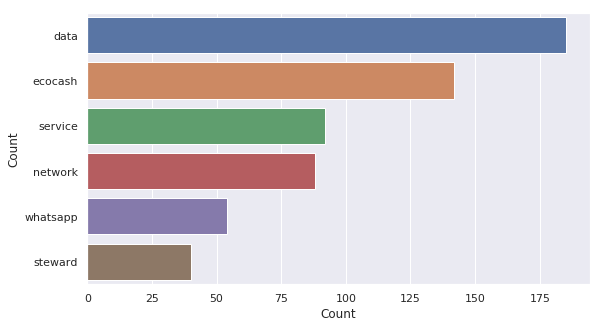

In [161]:
a = nltk.FreqDist(words)
d = pd.DataFrame({'Word': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(9,5))
ax = sns.barplot(data=d, x= "Count", y = "Word", orient="h")
ax.set(ylabel = 'Count')
plt.show()

In [163]:
sns.set(rc={'figure.figsize':(12, 5)})

In [165]:
d

,Word,Count
2,data,185
1,ecocash,142
0,service,92
3,network,88
4,whatsapp,54
5,steward,40


In [166]:
sum_count = sum(d['Count'])

In [168]:
d['Percentage'] = (d['Count']/sum_count)*100

In [169]:
d

,Word,Count,Percentage
2,data,185,30.782030
1,ecocash,142,23.627288
0,service,92,15.307820
3,network,88,14.642263
4,whatsapp,54,8.985025
5,steward,40,6.655574


In [174]:
d['Percentage'] = d['Percentage'].apply(round)

In [178]:
d

,Word,Count,Percentage
2,data,185,31
1,ecocash,142,24
0,service,92,15
3,network,88,15
4,whatsapp,54,9
5,steward,40,7


In [194]:
d.at[3, 'Percentage'] = 14

In [195]:
d

,Word,Count,Percentage
2,data,185,31
1,ecocash,142,24
0,service,92,15
3,network,88,14
4,whatsapp,54,9
5,steward,40,7


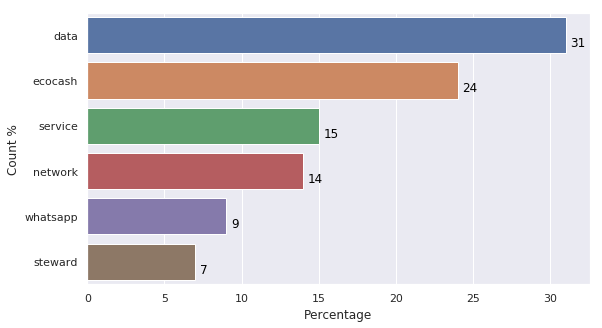

In [199]:
plt.figure(figsize=(9,5))
ax = sns.barplot(data=d, x= "Percentage", y = "Word", orient="h")
ax.set(ylabel = 'Count %')

for i, v in enumerate(d['Percentage']):
    ax.text(v + 0.3, i + .25, str(v), color='black')

plt.show()

The bar plot above shows the distribution of complaint/enquiry categories since Feb 2012 to March 2019.

Let's see the behavior of these complaints over the 7 years.

In [201]:
dat_data = data_econet[data_econet['tidy_tweet'].str.contains('data', regex=True)]
dat_ecocash = data_econet[data_econet['tidy_tweet'].str.contains('ecocash', regex=True)]
dat_service = data_econet[data_econet['tidy_tweet'].str.contains('service', regex=True)]
dat_network = data_econet[data_econet['tidy_tweet'].str.contains('network', regex=True)]
dat_whatsapp = data_econet[data_econet['tidy_tweet'].str.contains('whatsapp', regex=True)]
dat_steward = data_econet[data_econet['tidy_tweet'].str.contains('steward', regex=True)]

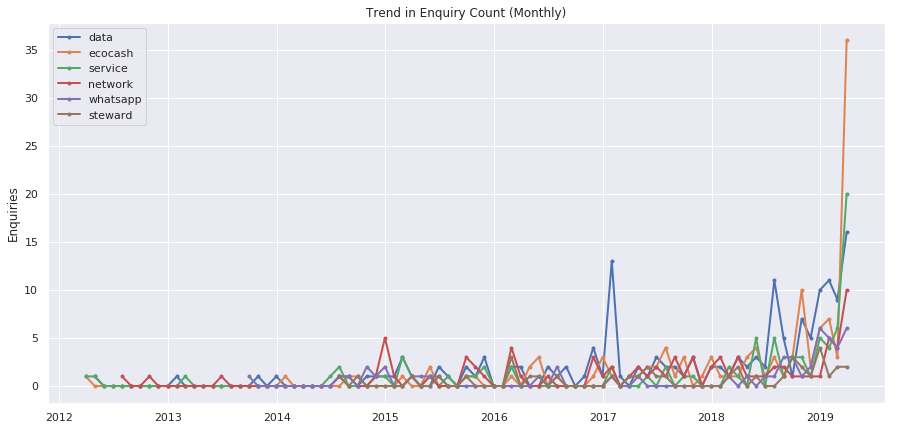

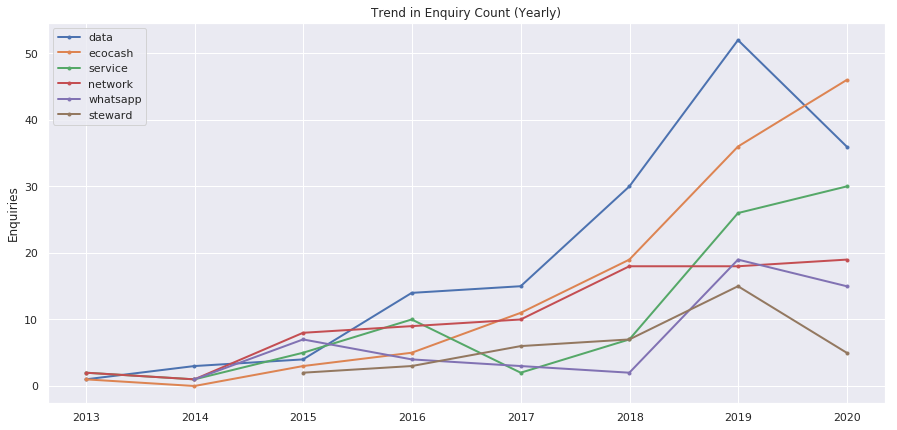

In [209]:
fig1, ax1 = plt.subplots(figsize=(15,7))

ax1.plot(dat_data['enquiry_count'].resample("M", convention='end').sum(), marker='.', linewidth=2, label="data")

ax1.set_ylabel("Enquiries")
ax1.set_title("Trend in Enquiry Count (Monthly)")

ax1.plot(dat_ecocash['enquiry_count'].resample("M", convention='end').sum(), marker='.', linewidth=2, label="ecocash")
ax1.plot(dat_service['enquiry_count'].resample("M", convention='end').sum(), marker='.', linewidth=2, label="service")
ax1.plot(dat_network['enquiry_count'].resample("M", convention='end').sum(), marker='.', linewidth=2, label="network")
ax1.plot(dat_whatsapp['enquiry_count'].resample("M", convention='end').sum(), marker='.', linewidth=2, label="whatsapp")
ax1.plot(dat_steward['enquiry_count'].resample("M", convention='end').sum(), marker='.', linewidth=2, label="steward")
ax1.legend()

fig2, ax2 = plt.subplots(figsize=(15,7))

ax2.plot(dat_data['enquiry_count'].resample("Y", convention='end').sum(), marker='.', linewidth=2, label="data")

ax2.set_ylabel("Enquiries")
ax2.set_title("Trend in Enquiry Count (Yearly)")

ax2.plot(dat_ecocash['enquiry_count'].resample("Y", convention='end').sum(), marker='.', linewidth=2, label="ecocash")
ax2.plot(dat_service['enquiry_count'].resample("Y", convention='end').sum(), marker='.', linewidth=2, label="service")
ax2.plot(dat_network['enquiry_count'].resample("Y", convention='end').sum(), marker='.', linewidth=2, label="network")
ax2.plot(dat_whatsapp['enquiry_count'].resample("Y", convention='end').sum(), marker='.', linewidth=2, label="whatsapp")
ax2.plot(dat_steward['enquiry_count'].resample("Y", convention='end').sum(), marker='.', linewidth=2, label="steward")
ax2.legend()

plt.grid(which='minor', axis='both')

The time series above gives us some very interesting insights.
 - For instance, we can see that Econet started to get considerable enquiries from mid 2014 onwards.
 - From the yearly time series, we can see that the most prevalent complaint at the close of 2014 was network. This was mostly attributed to the last month of 2014, December. This is where network problems were at their peak in that year.
 - Network doesn't change significantly the following year but there are major upshoots in the service and data categories. Service at least doubles in quantity while data quadruples at the close of 2015. Unlike network in 2014, service and data complaints are more spread out throughout the year.
 - There's a drop in service complaints and whatsapp as well at the end of 2016. The latter has been on a steady decrease 2014. There are no changes in data and network, but a sharp increase in ecocash is observed. Ecocash complaints peak in May and December of 2016.
 - Whatsapp problems continue on their steady descent at the end of 2017, but there are sharp increase in all other categories (except steward bank, it remains the same). Data leads, with ecocash, network and service following in that order. Data's lead could be attributed to its very large spike in January 2017. Ecocash and network fluctuate throughout the year.
 - 2018 seems to be the year where Econet got most of its complaints in the period investigated. Apart from network which mostly remained the same, every other category shot sharply. Data, ecocash, service, whatsapp and steward bank all had sharp rises.
 - The current year (2019) could be the most interesting of the bunch. It has the highest peaks of all the years, and this data only ends in March. All catgories seem to have been multiplied by a factor of 4. Interestingly, ecocash now leads, with data in second.

Let's also see in which month, week or on which day does econet get complaints the most, on average.